In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

def function(t):
  return -2*math.sin(8*t)
t = np.linspace(0, 10, 101)  

exact=[]                      
for i in t:
    exact.append(function(i))


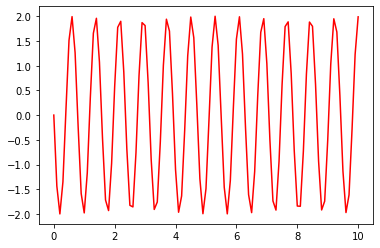

In [2]:
plt.plot(t, exact, 'r', label='exact(t)')

# **RK4 method**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
def f(x, t, b, k):
    return np.array([x[1], -k*x[0]])

t = np.linspace(0, 10, 101) 
b = 0
k = 64
y0 = np.array([0,-16])

def rungekutta1(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2., t[i] + h / 2., *args)
        k3 = f(y[i] + k2 * h / 2., t[i] + h / 2., *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i+1] = y[i] + (h / 6.) * (k1 + 2*k2 + 2*k3 + k4)
    return y

rk1 = rungekutta1(f, y0, t, args=(b, k))




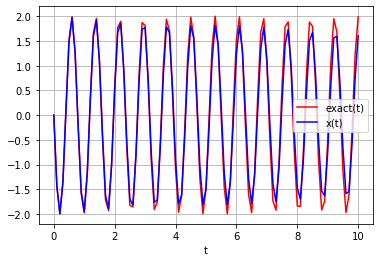

In [4]:
plt.plot(t, exact, 'r', label='exact(t)')
plt.plot(t, rk1[:, 0], 'b', label='x(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

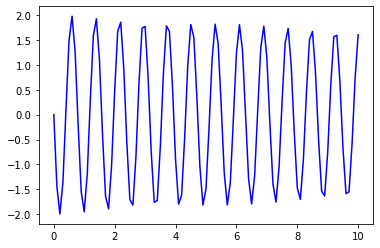

In [5]:
plt.plot(t, rk1[:, 0], 'b', label='I(t)')

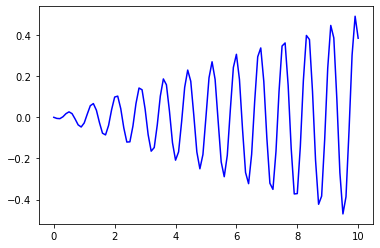

In [6]:
err=[]
for i in range(len(t)):
  err.append(exact[i]-rk1[:,0][i])

plt.plot(t, err, 'b', label='err')



In [7]:
Sum=0
ab=0
for i in range(len(t)):
  Sum=Sum=+ err[i]**2
  ab=ab + abs(err[i])

RMSE=math.sqrt(Sum)/len(t)
MAE=ab/len(t)

print("RMSE = ",RMSE)
print("MAE = ",MAE)


RMSE =  0.0038093674391385672
MAE =  0.1655943707053843


# **odeint() method**

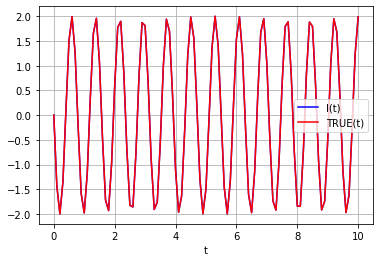

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(x, t, b, k):
    return np.array([x[1], -k*x[0]])

t = np.linspace(0, 10, 101) 
b = 0
k = 64
y0 = np.array([0,-16])

odeintsol = odeint(f, y0, t, args=(b, k))

plt.plot(t, odeintsol[:, 0], 'b', label='I(t)')
plt.plot(t, exact, 'r', label='TRUE(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()


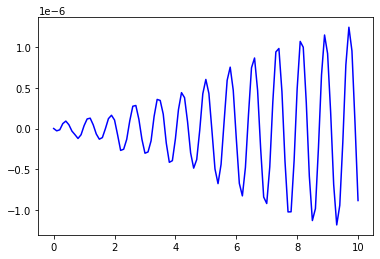

In [36]:
err=[]
for i in range(len(t)):
  err.append(exact[i]-odeintsol[:,0][i])


plt.plot(t, err, 'b', label='Q(t)')


In [37]:
Sum=0
ab=0
for i in range(len(t)):
  Sum=Sum=+ err[i]**2
  ab=ab + abs(err[i])

RMSE=math.sqrt(Sum)/len(t)
MAE=ab/len(t)

print("RMSE = ",RMSE)
print("MAE = ",MAE)

RMSE =  8.745691172362789e-09
MAE =  4.095599212271962e-07
